## Analysis of water stage at Hel and Tolkmicko

In [2]:
import sys
print("Python version: {}".format(sys.version))

Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import gridspec

import datetime as dt
import ipywidgets as widgets

path = "../data/"
prepared_path = path+"prepared/"

plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100 #

#### Data import

In [4]:
df_hel = pd.read_pickle(prepared_path+"df_hel.pkl")
df_hel.head(3)

,date_time,stage
0,2008-01-01 00:10:00,527
1,2008-01-01 00:30:00,527
2,2008-01-01 03:20:00,526


In [5]:
df_tol = pd.read_pickle(prepared_path+"df_tol.pkl")
df_tol.head(3)

,date_time,stage
0,2008-01-01 01:40:00,534
1,2008-01-01 05:50:00,533
2,2008-01-01 07:20:00,532


In [6]:
df_error = pd.read_pickle(prepared_path+"df_error.pkl")
df_error["error"] = df_error["observations"] - df_error["predictions"]
df_error.head(3)

,date,observations,predictions,error
0,2008-01-01,0.246,0.25,-0.004
1,2008-01-02,0.223,0.18,0.043
2,2008-01-03,0.056,0.00,0.056


In [7]:
obs = df_error["observations"].to_numpy()
pred = df_error["predictions"].to_numpy()
df_error.describe()

,date,observations,predictions,error
count,3650,3650.000000,3650.000000,3650.000000
mean,2012-12-31 00:00:00,0.059385,0.010115,0.049271
min,2008-01-01 00:00:00,-0.580000,-0.600000,-0.667000
25%,2010-07-02 06:00:00,-0.060000,-0.120000,0.000000
50%,2012-12-31 00:00:00,0.060000,0.010000,0.045500
75%,2015-07-01 18:00:00,0.179000,0.130000,0.096000
max,2017-12-31 00:00:00,1.319000,1.250000,0.620000
std,NaN,0.198013,0.202657,0.091878


In [8]:
df_wind = pd.read_pickle(prepared_path+"df_wind.pkl")
df_wind.head(3)

,date_time,AL [st],W [m/s]
0,2008-01-01 00:00:00,151.83,2.50
1,2008-01-01 01:00:00,151.83,2.50
2,2008-01-01 02:00:00,155.17,2.78


In [9]:
df_water_stage = pd.read_pickle(prepared_path+"df_water_stage.pkl")
df_water_stage.head(3)

,data,Hel (A),Tolkmicko (C),A [m npm],C [m npm],A-num,C-num
0,2008-01-01,524.8,532.6,0.248,0.246,0.25,0.25
1,2008-01-02,515.8,530.3,0.158,0.223,0.16,0.18
2,2008-01-03,495.1,513.6,-0.049,0.056,-0.05,0.00


#### Datum levels at Hel and Tolkmicko

In [10]:
H0_hel = 500
H0_tol = 508

### Water stage statistical analysis

#### Tolkmicko

##### Original data (not averaged)
Histogram and boxplot

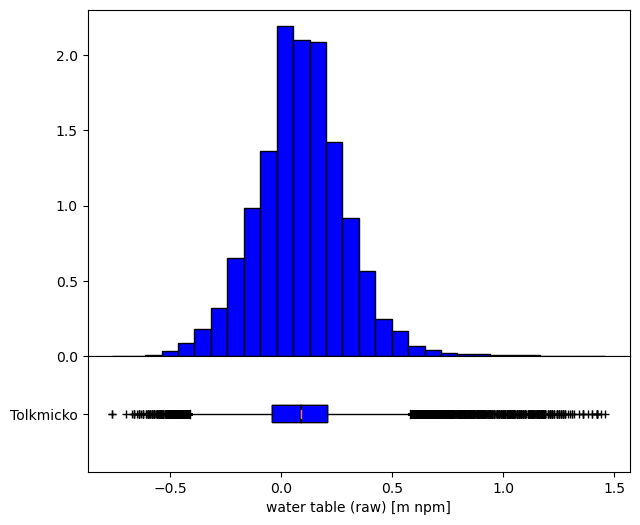

In [11]:
plt.rcParams['figure.figsize'] = [7, 6]
plt.rcParams['figure.dpi'] = 100 #

gs = gridspec.GridSpec(2, 1, height_ratios=[0.75,0.25], wspace=0.0, hspace=0.0)

axs=[None,None]
axs[0] = plt.subplot(gs[0])
axs[1] = plt.subplot(gs[1])

v = (df_tol["stage"].to_numpy()-H0_tol)/100.  # water level with respect to datum
_ = axs[0].hist(v,bins=30,density=True,color="blue",edgecolor="black")

bp = axs[1].boxplot(v,labels = ["Tolkmicko"], notch = True,sym="+",patch_artist=True,vert=False)
bp['boxes'][0].set(facecolor="blue")
plt.xlabel("water table (raw) [m npm]")
pass

Basic statistics

In [12]:
v = (df_tol["stage"].to_numpy()-H0_tol)/100.  # water level with respect to datum
list(map(lambda x: np.round(x,3),[
    np.mean(v),
    np.std(v),
    np.min(v),
    np.quantile(v,0.25),
    np.median(v),
    np.quantile(v,0.75),
    np.max(v)
    ]
   ))

[0.088, 0.202, -0.76, -0.04, 0.09, 0.21, 1.46]

##### Averaged data (daily)

Text(0.5, 0, 'water table (avg) [m npm]')

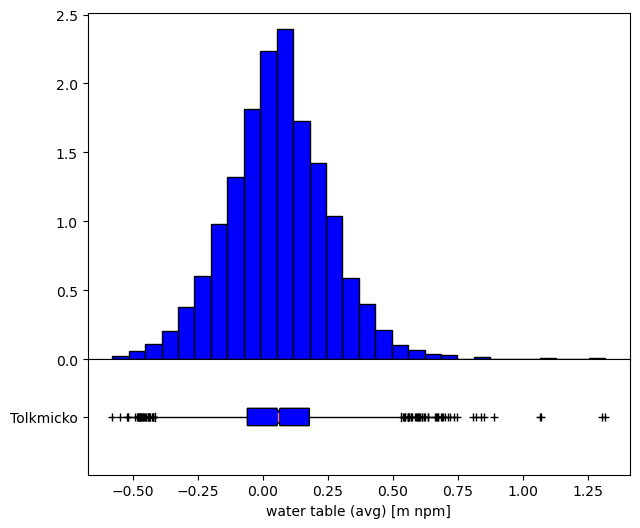

In [13]:
plt.rcParams['figure.figsize'] = [7, 6]
plt.rcParams['figure.dpi'] = 100 #

gs = gridspec.GridSpec(2, 1, height_ratios=[0.75,0.25], wspace=0.0, hspace=0.0)

axs=[None,None]
axs[0] = plt.subplot(gs[0])
axs[1] = plt.subplot(gs[1])

_ = axs[0].hist(df_water_stage[" C [m npm]"],bins=30,density=True,color="blue",edgecolor="black")

bp = axs[1].boxplot(df_water_stage[" C [m npm]"],labels = ["Tolkmicko"], notch = True,sym="+",patch_artist=True,vert=False)
bp['boxes'][0].set(facecolor="blue")
plt.xlabel("water table (avg) [m npm]")

Basic statistics

In [14]:
v = df_water_stage[" C [m npm]"].to_numpy()  # water level with respect to datum
list(map(lambda x: np.round(x,3),[
    np.mean(v),
    np.std(v),
    np.min(v),
    np.quantile(v,0.25),
    np.median(v),
    np.quantile(v,0.75),
    np.max(v)
    ]
   ))

[0.059, 0.198, -0.58, -0.06, 0.06, 0.179, 1.319]

##### Comparison of averaged and original data

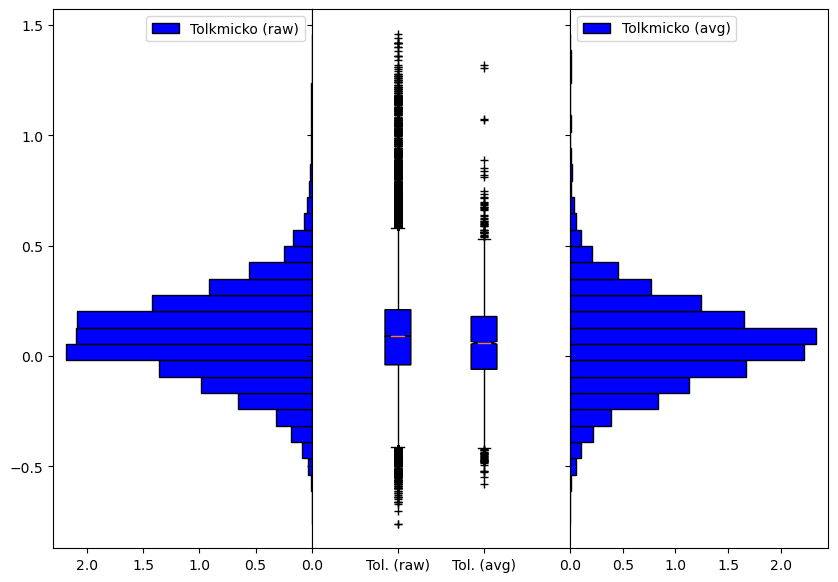

In [15]:
fig, axs = plt.subplots(1, 3, sharey=True,figsize=(10, 7))
fig.subplots_adjust(hspace=0,wspace=0)

A = (df_tol["stage"].to_numpy()-H0_tol)/100.
B = df_water_stage[" C [m npm]"]

bins = list(np.histogram(np.concatenate((A,B)),bins = 30)[1])

axs[0].invert_xaxis()
axs[0].hist(A,bins=bins,density=True,color="blue",edgecolor="black",orientation="horizontal")
#axs[0].set_xlim(0.75,0.)
axs[0].legend(["Tolkmicko (raw)"],loc="upper right")

bp = axs[1].boxplot([A,B],notch = True, labels = ["Tol. (raw)","Tol. (avg)"],sym="+",patch_artist=True,
                    positions=[1,1.5])
color=["blue","blue"]
for i,box in enumerate(bp['boxes']):
    box.set(facecolor=color[i] )
pass


axs[2].hist(B,bins=bins,density=True,color="blue",edgecolor="black",orientation="horizontal")
#axs[2].set_xlim(0,0.75)
axs[2].legend(["Tolkmicko (avg)"],loc="upper left")
pass

Testing if two samples come from the same distribution.
Obviously averaged and not averaged data should have different pdfs, however test is performed just to see what would be the outcome.

In [16]:
A = (df_tol["stage"].to_numpy()-H0_tol)/100.
B = df_water_stage[" C [m npm]"]
st.ks_2samp(A,B)

KstestResult(statistic=0.08373898959135362, pvalue=3.07577111602799e-22, statistic_location=0.11899999999999977, statistic_sign=-1)

##### Influence of averaging at Tolkmicko

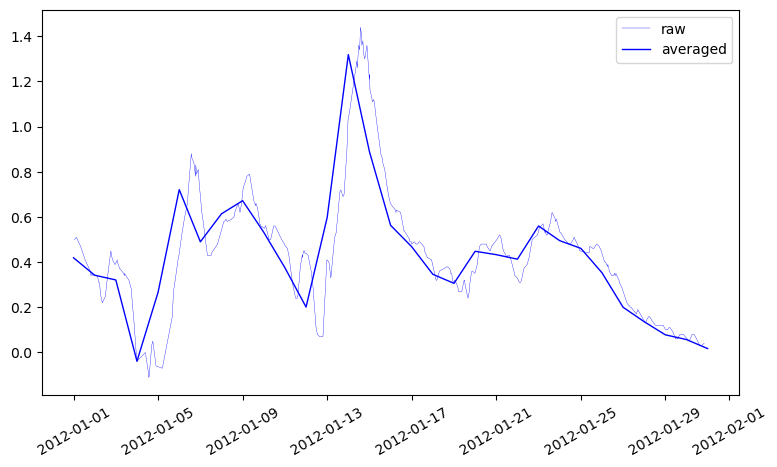

In [17]:
plt.rcParams['figure.figsize'] = [9, 5]
plt.rcParams['figure.dpi'] = 100 #

tA = pd.to_datetime(dt.date(2012, 1, 1))
tB = pd.to_datetime(dt.date(2012, 1, 31))


cond = (df_tol["date_time"]>=tA) & (df_tol["date_time"]<=tB)
tmp_df = df_tol.loc[cond]
plt.plot(tmp_df["date_time"],(tmp_df["stage"].to_numpy()-H0_tol)/100.,color="blue",linewidth=0.25)


cond = (df_water_stage["data"]>=tA) & (df_water_stage["data"]<=tB)
tmp_df = df_water_stage.loc[cond]
plt.plot(tmp_df["data"],tmp_df[" C [m npm]"].to_numpy(),color="blue",linewidth=1)

plt.xticks(rotation=30)
plt.legend(["raw","averaged"])

#### Hel

##### Original data (not averaged)
Histogram and boxplot

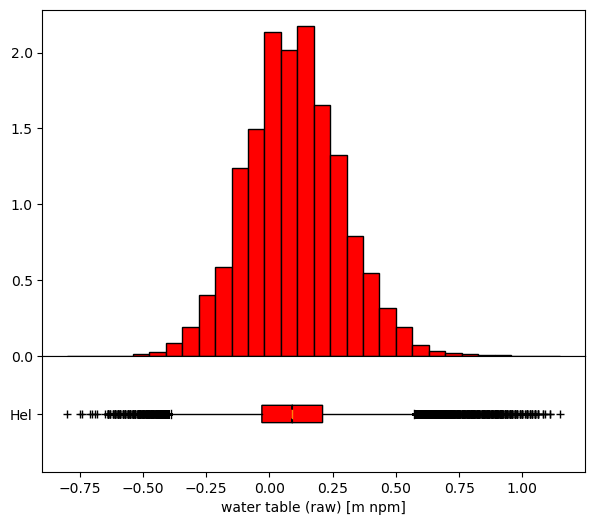

In [18]:
plt.rcParams['figure.figsize'] = [7, 6]
plt.rcParams['figure.dpi'] = 100 #

gs = gridspec.GridSpec(2, 1, height_ratios=[0.75,0.25], wspace=0.0, hspace=0.0)

axs=[None,None]
axs[0] = plt.subplot(gs[0])
axs[1] = plt.subplot(gs[1])

v = (df_hel["stage"].to_numpy()-H0_hel)/100.  # water level with respect to datum

_ = axs[0].hist(v,bins=30,density=True,color="red",edgecolor="black")

bp = axs[1].boxplot(v,labels = ["Hel"], notch = True,sym="+",patch_artist=True,vert=False)
bp['boxes'][0].set(facecolor="red")
plt.xlabel("water table (raw) [m npm]")
pass

Basic stats

In [19]:
v = (df_hel["stage"].to_numpy()-H0_hel)/100.    # water level with respect to datum
list(map(lambda x: np.round(x,3),[
    np.mean(v),
    np.std(v),
    np.min(v),
    np.quantile(v,0.25),
    np.median(v),
    np.quantile(v,0.75),
    np.max(v)
    ]
   ))

[0.095, 0.193, -0.8, -0.03, 0.09, 0.21, 1.15]

##### Averaged data (daily)

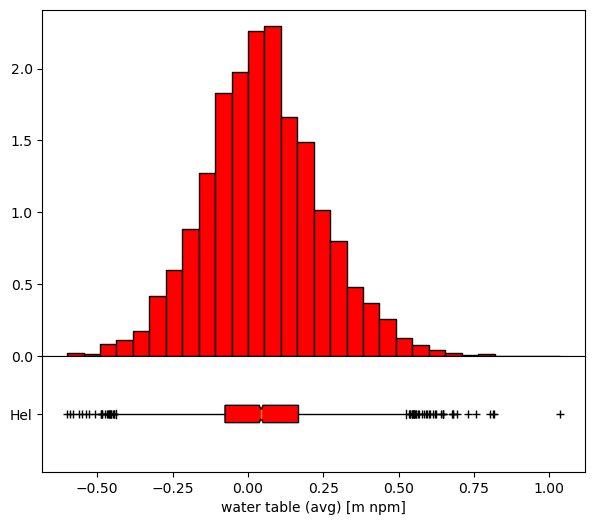

In [20]:
plt.rcParams['figure.figsize'] = [7, 6]
plt.rcParams['figure.dpi'] = 100 #

gs = gridspec.GridSpec(2, 1, height_ratios=[0.75,0.25], wspace=0.0, hspace=0.0)

axs=[None,None]
axs[0] = plt.subplot(gs[0])
axs[1] = plt.subplot(gs[1])

_ = axs[0].hist(df_water_stage[" A [m npm]"],bins=30,density=True,color="red",edgecolor="black")

bp = axs[1].boxplot(df_water_stage[" A [m npm]"],labels = ["Hel"], notch = True,sym="+",patch_artist=True,vert=False)
bp['boxes'][0].set(facecolor="red")
plt.xlabel("water table (avg) [m npm]")
pass

Basic stats

In [21]:
v = df_water_stage[" A [m npm]"].to_numpy()  # water level with respect to datum
list(map(lambda x: np.round(x,3),[
    np.mean(v),
    np.std(v),
    np.min(v),
    np.quantile(v,0.25),
    np.median(v),
    np.quantile(v,0.75),
    np.max(v)
    ]
   ))

[0.049, 0.194, -0.6, -0.076, 0.044, 0.168, 1.037]

##### Comparison of averaged and original data

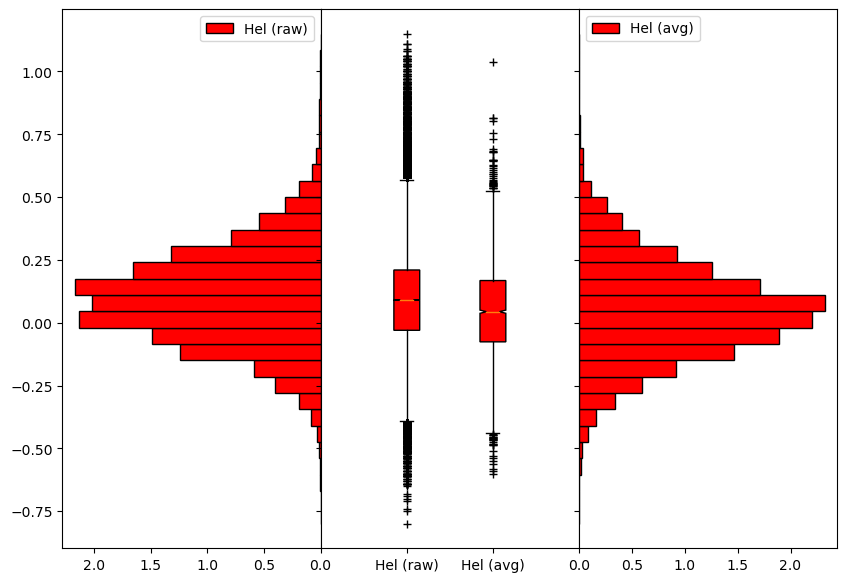

In [22]:
fig, axs = plt.subplots(1, 3, sharey=True,figsize=(10, 7))
fig.subplots_adjust(hspace=0,wspace=0)

A = (df_hel["stage"].to_numpy()-H0_hel)/100.
B = df_water_stage[" A [m npm]"]

bins = list(np.histogram(np.concatenate((A,B)),bins = 30)[1])

axs[0].invert_xaxis()
axs[0].hist(A,bins=bins,density=True,color="red",edgecolor="black",orientation="horizontal")
#axs[0].set_xlim(0.75,0.)
axs[0].legend(["Hel (raw)"],loc="upper right")

bp = axs[1].boxplot([A,B],notch = True, labels = ["Hel (raw)","Hel (avg)"],sym="+",patch_artist=True,
                    positions=[1,1.5])
color=["red","red"]
for i,box in enumerate(bp['boxes']):
    box.set(facecolor=color[i] )
pass


axs[2].hist(B,bins=bins,density=True,color="red",edgecolor="black",orientation="horizontal")
#axs[2].set_xlim(0,0.75)
axs[2].legend(["Hel (avg)"],loc="upper left")
pass

In [23]:
A = (df_hel["stage"].to_numpy()-H0_hel)/100.
B = df_water_stage[" A [m npm]"]
st.ks_2samp(A,B)

KstestResult(statistic=0.12204122645536009, pvalue=6.903107794444704e-47, statistic_location=0.09899999999999977, statistic_sign=-1)

##### Influence of averaging at Tolkmicko

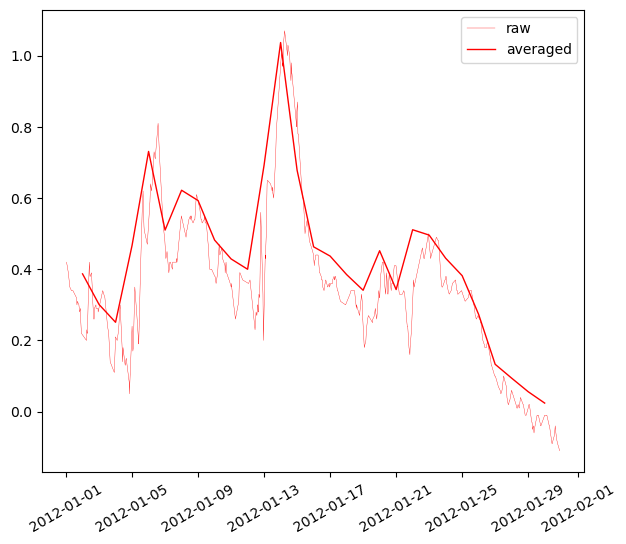

In [24]:
tA = pd.to_datetime(dt.date(2012, 1, 1))
tB = pd.to_datetime(dt.date(2012, 1, 31))


cond = (df_hel["date_time"]>tA) & (df_hel["date_time"]<tB)
tmp_df = df_hel.loc[cond]
plt.plot(tmp_df["date_time"],(tmp_df["stage"].to_numpy()-H0_tol)/100.,color="red",linewidth=0.25)


cond = (df_water_stage["data"]>tA) & (df_water_stage["data"]<tB)
tmp_df = df_water_stage.loc[cond]
plt.plot(tmp_df["data"],tmp_df[" A [m npm]"].to_numpy(),color="red",linewidth=1)

plt.xticks(rotation=30)
plt.legend(["raw","averaged"])

##### Tolkmicko vs. Hel (original data)

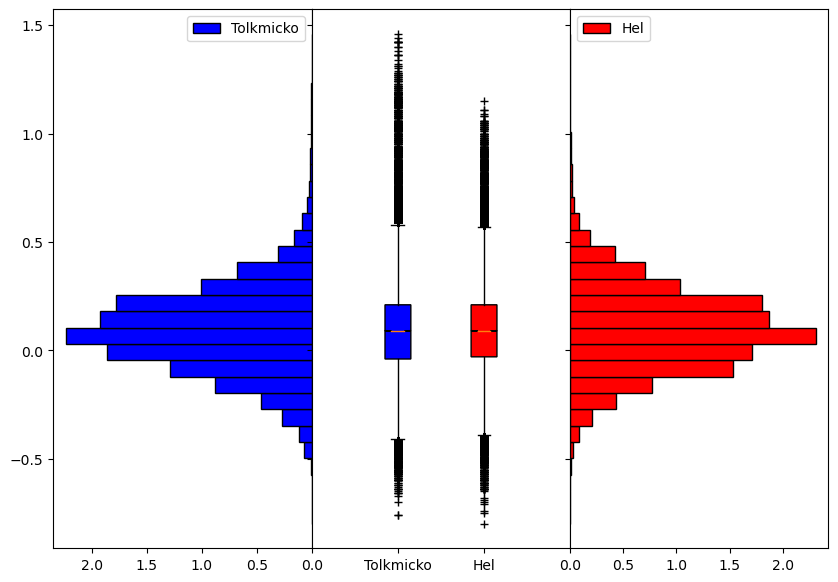

In [25]:
fig, axs = plt.subplots(1, 3, sharey=True,figsize=(10, 7))
fig.subplots_adjust(hspace=0,wspace=0)

A = (df_tol["stage"].to_numpy()-H0_tol)/100.
B = (df_hel["stage"].to_numpy()-H0_hel)/100.

bins = list(np.histogram(np.concatenate((A,B)),bins = 30)[1])

axs[0].invert_xaxis()
axs[0].hist(A,bins=bins,density=True,color="blue",edgecolor="black",orientation="horizontal")
#axs[0].set_xlim(0.75,0.)
axs[0].legend(["Tolkmicko"],loc="upper right")

bp = axs[1].boxplot([A,B],notch = True, labels = ["Tolkmicko","Hel"],sym="+",patch_artist=True,
                    positions=[1,1.5])
color=["blue","red"]
for i,box in enumerate(bp['boxes']):
    box.set(facecolor=color[i] )
pass


axs[2].hist(B,bins=bins,density=True,color="red",edgecolor="black",orientation="horizontal")
#axs[2].set_xlim(0,0.75)
axs[2].legend(["Hel"],loc="upper left")
pass

In [26]:
A = (df_tol["stage"].to_numpy()-H0_tol)/100.
B = (df_hel["stage"].to_numpy()-H0_hel)/100.
st.ks_2samp(A,B)

KstestResult(statistic=0.023333285027025447, pvalue=2.5781831165625924e-41, statistic_location=-0.14, statistic_sign=1)

##### Tolkmicko vs. Hel (averaged data)

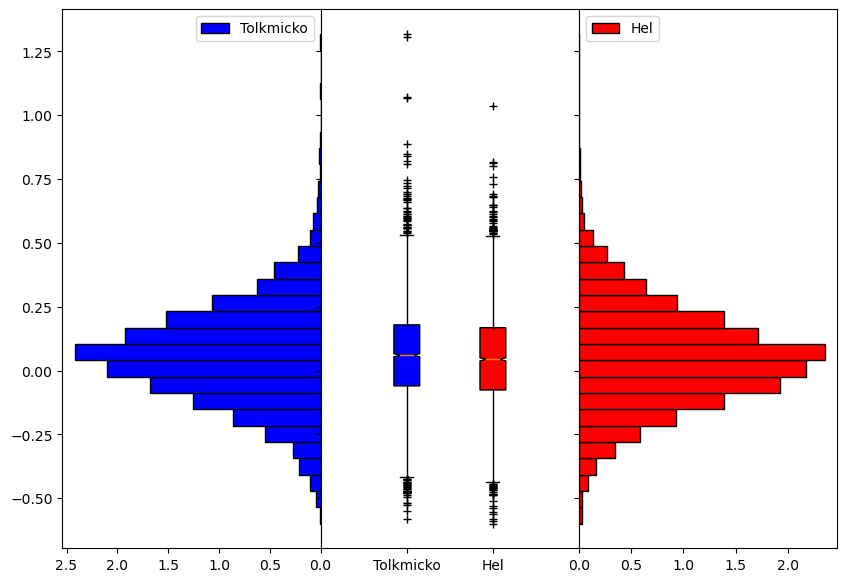

In [27]:
fig, axs = plt.subplots(1, 3, sharey=True,figsize=(10, 7))
fig.subplots_adjust(hspace=0,wspace=0)

A = df_water_stage[" C [m npm]"].to_numpy()
B = df_water_stage[" A [m npm]"].to_numpy()

bins = list(np.histogram(np.concatenate((A,B)),bins = 30)[1])

axs[0].invert_xaxis()
axs[0].hist(A,bins=bins,density=True,color="blue",edgecolor="black",orientation="horizontal")
#axs[0].set_xlim(0.75,0.)
axs[0].legend(["Tolkmicko"],loc="upper right")

bp = axs[1].boxplot([A,B],notch = True, labels = ["Tolkmicko","Hel"],sym="+",patch_artist=True,
                    positions=[1,1.5])
color=["blue","red"]
for i,box in enumerate(bp['boxes']):
    box.set(facecolor=color[i] )
pass


axs[2].hist(B,bins=bins,density=True,color="red",edgecolor="black",orientation="horizontal")
#axs[2].set_xlim(0,0.75)
axs[2].legend(["Hel"],loc="upper left")
pass

In [28]:
A = df_water_stage[" C [m npm]"].to_numpy()
B = df_water_stage[" A [m npm]"].to_numpy()
st.ks_2samp(A,B)

KstestResult(statistic=0.040547945205479455, pvalue=0.004948001239182015, statistic_location=0.056999999999999884, statistic_sign=-1)

### Time series analysis

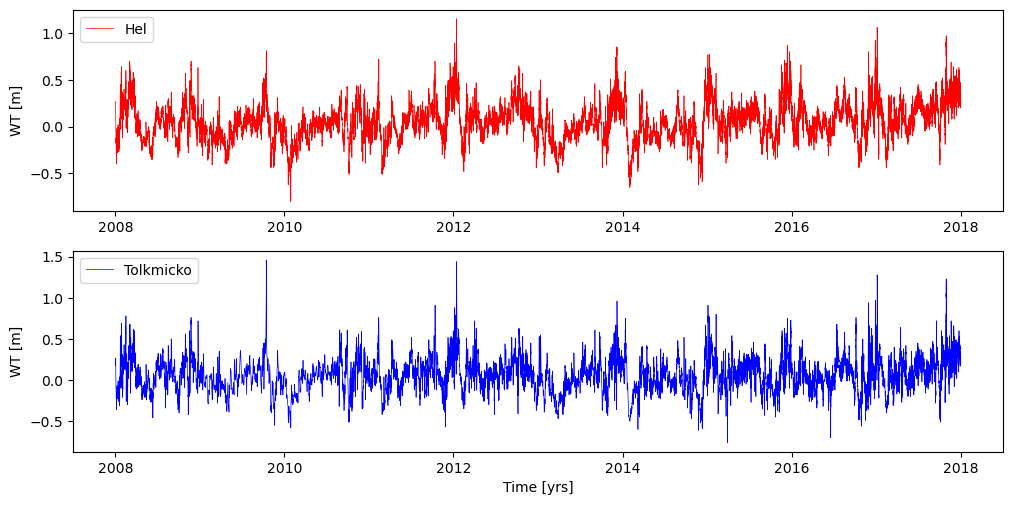

In [29]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 100 #

A = (df_tol["stage"].to_numpy()-H0_tol)/100.
B = (df_hel["stage"].to_numpy()-H0_hel)/100.

ax1=plt.subplot(4, 1, 1)
ax1.plot(df_hel["date_time"],B,color="red",linewidth=0.5)
plt.ylabel("WT [m]")
plt.legend(["Hel"])
ax2=plt.subplot(4, 1, 2)
ax2.plot(df_tol["date_time"],A,color="blue",linewidth=0.5)
plt.ylabel("WT [m]")
plt.xlabel("Time [yrs]")
plt.legend(["Tolkmicko"])
pass

In [30]:
ts1 = df_tol["date_time"]
ts2 = df_hel["date_time"]

ts12 = pd.concat([ts1,ts2])
ts12 = ts12.sort_values()
ts12 = ts12.drop_duplicates()

In [31]:
min_dt = ts12.min()
max_dt = ts12.max()
[min_dt,max_dt]

[Timestamp('2008-01-01 00:10:00'), Timestamp('2017-12-31 23:50:00')]

In [32]:
time_ix = pd.date_range(start=min_dt, end=max_dt,freq="10min")
# time_ix
time_arr = time_ix.to_numpy()
time_df = pd.DataFrame({"date_time":time_ix,"stage":np.nan})
time_df.head(3)

,date_time,stage
0,2008-01-01 00:10:00,NaN
1,2008-01-01 00:20:00,NaN
2,2008-01-01 00:30:00,NaN


In [33]:
df_res = time_df.set_index('date_time').join(df_hel.set_index('date_time'),rsuffix='_hel')
df_res = df_res.join(df_tol.set_index('date_time'),rsuffix='_tol')
del df_res["stage"]
df_res = df_res.interpolate()

df_res['wl_hel']  = (df_res["stage_hel"]-H0_hel)/100.
df_res['wl_tol']  = (df_res["stage_tol"]-H0_tol)/100.


df_res['wl_hel_avg'] = df_res.loc[:,"wl_hel"].rolling('3600s', min_periods=1).mean()  # averaging with respect to time window
df_res['wl_tol_avg'] = df_res.loc[:,"wl_tol"].rolling('3600s', min_periods=1).mean()

df_res.head(3)

,stage_hel,stage_tol,wl_hel,wl_tol,wl_hel_avg,wl_tol_avg
date_time,,,,,,
2008-01-01 00:10:00,527.0,NaN,0.27,NaN,0.27,NaN
2008-01-01 00:20:00,527.0,NaN,0.27,NaN,0.27,NaN
2008-01-01 00:30:00,527.0,NaN,0.27,NaN,0.27,NaN


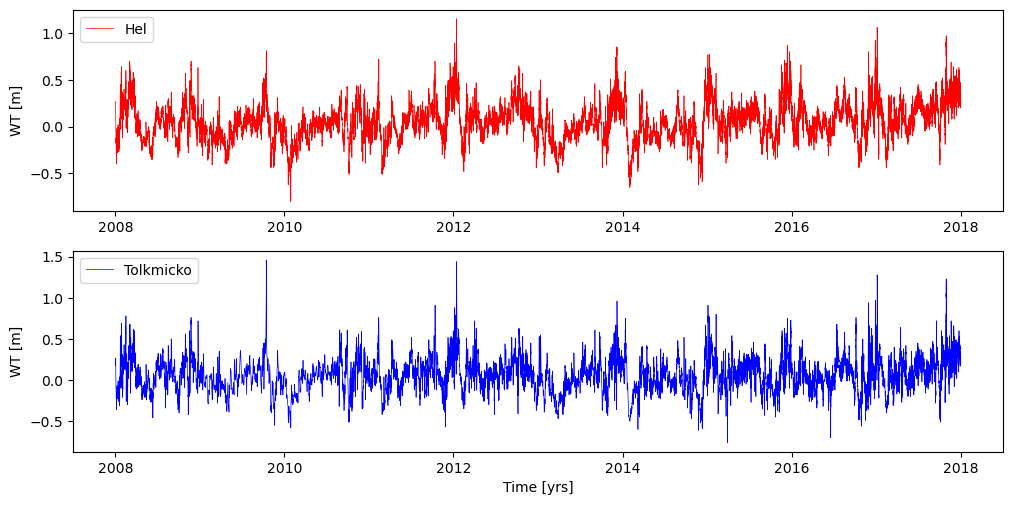

In [34]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 100 #

A = (df_tol["stage"].to_numpy()-H0_tol)/100.
B = (df_hel["stage"].to_numpy()-H0_hel)/100.

ax1=plt.subplot(4, 1, 1)
ax1.plot(df_hel["date_time"],B,color="red",linewidth=0.5)
plt.ylabel("WT [m]")
plt.legend(["Hel"])
ax2=plt.subplot(4, 1, 2)
ax2.plot(df_tol["date_time"],A,color="blue",linewidth=0.5)
plt.ylabel("WT [m]")
plt.xlabel("Time [yrs]")
plt.legend(["Tolkmicko"])
pass

##### Displaying a piece of timeseries

In [35]:
date_pickerA = widgets.DatePicker(
    description='Begin Date',
    disabled=False
)

date_pickerB = widgets.DatePicker(
    description='End Date',
    disabled=False
)

tA = dt.date(2008, 1, 1)
tB = dt.date(2008, 1, 31)

In [36]:
date_pickerA.value = tA
date_pickerA

DatePicker(value=datetime.date(2008, 1, 1), description='Begin Date', step=1)

In [37]:
date_pickerB.value = tB
date_pickerB

DatePicker(value=datetime.date(2008, 1, 31), description='End Date', step=1)

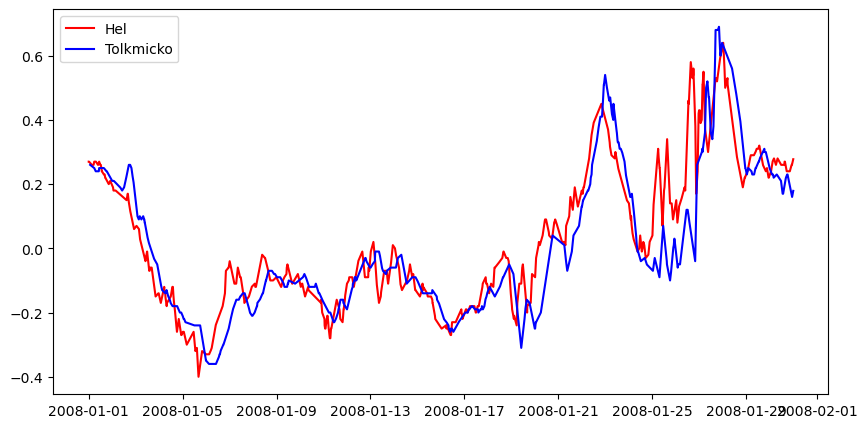

In [38]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100 #

tA = pd.to_datetime(date_pickerA.value)
tB = pd.to_datetime(date_pickerB.value)

cond = (df_res.index>tA) & (df_res.index<tB)
tmp_df = df_res.loc[cond]

plt.plot(tmp_df.index.to_numpy(),tmp_df["wl_hel"].to_numpy(),"red",
         tmp_df.index.to_numpy(),tmp_df["wl_tol"].to_numpy(),"blue")

plt.legend(["Hel","Tolkmicko"])
pass

##### Histogram 2D of water levels at Tolkmicko and Hel

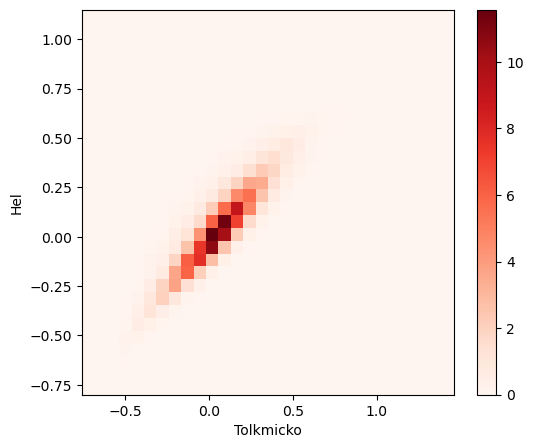

In [39]:
plt.rcParams['figure.figsize'] = [6, 5]
plt.rcParams['figure.dpi'] = 100 #
df = df_res.dropna()
plt.hist2d(df["wl_tol"],df["wl_hel"],bins=30,density=True,cmap=plt.cm.Reds)
plt.xlabel("Tolkmicko")
plt.ylabel("Hel")
plt.colorbar()
pass

##### Lag time analysis Hel vs Tolkmicko

maximizing $R^2$ with respect to the lag time

In [40]:
df_res[["wl_hel_avg","wl_tol_avg"]].corr() # no lag

,wl_hel_avg,wl_tol_avg
wl_hel_avg,1.000000,0.886269
wl_tol_avg,0.886269,1.000000


In [41]:
df_res[["wl_hel_avg","wl_tol_avg"]].corr().iloc[1,0]

0.8862687302555938

In [42]:
pd.options.mode.copy_on_write = True

In [43]:
lag_df = df_res[["wl_tol_avg","wl_hel_avg"]]
for l in range(40,43):
    lag_df["hel_lag"+str(l)] = lag_df["wl_hel_avg"].shift(l)
lag_df

,wl_tol_avg,wl_hel_avg,hel_lag40,hel_lag41,hel_lag42
date_time,,,,,
2008-01-01 00:10:00,NaN,0.270000,NaN,NaN,NaN
2008-01-01 00:20:00,NaN,0.270000,NaN,NaN,NaN
2008-01-01 00:30:00,NaN,0.270000,NaN,NaN,NaN
2008-01-01 00:40:00,NaN,0.269853,NaN,NaN,NaN
2008-01-01 00:50:00,NaN,0.269647,NaN,NaN,NaN
...,...,...,...,...,...
2017-12-31 23:10:00,0.230000,0.331667,0.303333,0.301667,0.298333
2017-12-31 23:20:00,0.223333,0.336667,0.300000,0.303333,0.301667
2017-12-31 23:30:00,0.218333,0.343333,0.300000,0.300000,0.303333


In [44]:
lag_df.corr()["wl_tol_avg"]

wl_tol_avg    1.000000
wl_hel_avg    0.886269
hel_lag40     0.919444
hel_lag41     0.919468
hel_lag42     0.919450
Name: wl_tol_avg, dtype: float64

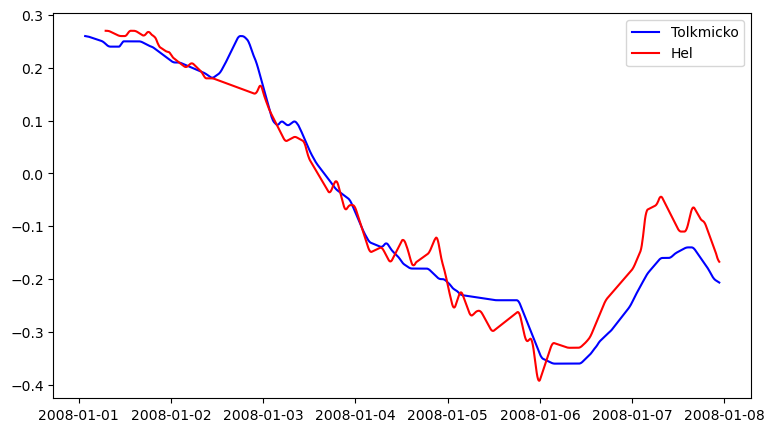

In [45]:
plt.rcParams['figure.figsize'] = [9, 5]
plt.rcParams['figure.dpi'] = 100 #

n= 1000
t = lag_df.iloc[1:n,].index
A = lag_df["wl_tol_avg"].iloc[1:n]
B = lag_df[lag_df.columns[-2]].iloc[1:n] 
plt.plot(t,A,color="blue")
plt.plot(t,B,color="red")
plt.legend(["Tolkmicko","Hel"])

In [46]:
lag_df = df_res[["wl_tol","wl_hel"]]
for l in range(40,43):
    lag_df["hel_lag"+str(l)] = lag_df["wl_hel"].shift(l)
# lag_df
lag_df.corr()["wl_tol"]

wl_tol       1.000000
wl_hel       0.885608
hel_lag40    0.918910
hel_lag41    0.918934
hel_lag42    0.918911
Name: wl_tol, dtype: float64

##### Histogram 2D of water levels at Tolkmicko and Hel including lag

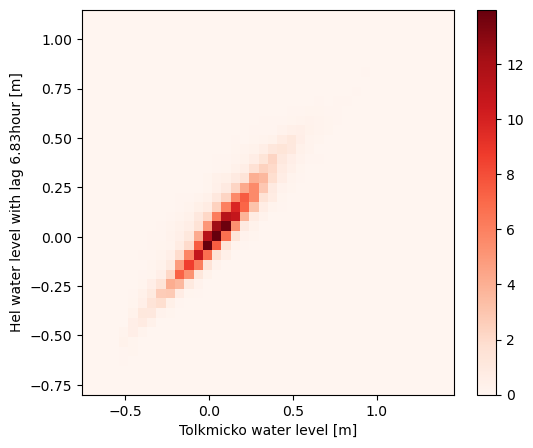

In [47]:
plt.rcParams['figure.figsize'] = [6, 5]
plt.rcParams['figure.dpi'] = 100 #

df = lag_df.dropna()
plt.hist2d(df["wl_tol"],df["hel_lag41"],bins=40,density=True,cmap=plt.cm.Reds)
plt.colorbar()
plt.xlabel("Tolkmicko water level [m]")
plt.ylabel("Hel water level with lag 6.83hour [m]")
pass

In [48]:
lag_df = df_water_stage[[" A [m npm]"," C [m npm]"]]
lag_df.columns = ["Hel","Tol"]
for l in range(0,10):
    lag_df["Hel_lag"+str(l)] = lag_df["Hel"].shift(l)
# lag_df
lag_df.corr()["Tol"]

Hel         0.906865
Tol         1.000000
Hel_lag0    0.906865
Hel_lag1    0.893516
Hel_lag2    0.792422
Hel_lag3    0.729802
Hel_lag4    0.676596
Hel_lag5    0.633877
Hel_lag6    0.598962
Hel_lag7    0.560334
Hel_lag8    0.526151
Hel_lag9    0.489592
Name: Tol, dtype: float64

##### $\chi^2$ independence test of water stage at Hel and Tolkmicko

In [49]:
df = df_water_stage[[" A [m npm]"," C [m npm]"]].dropna()
f2d = np.histogram2d(df[" A [m npm]"],df[" C [m npm]"],bins=13)[0]
st.chi2_contingency(f2d).pvalue

0.0

#### Error vs. water stage at Hel

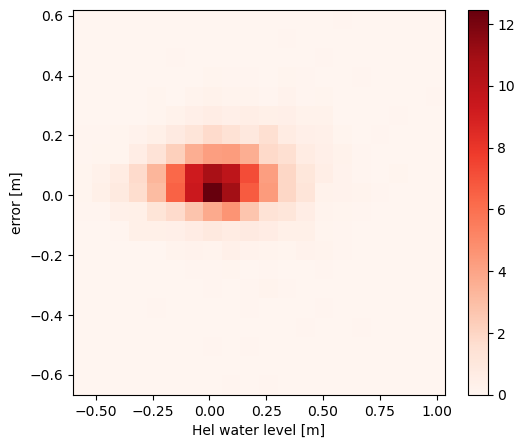

In [50]:
plt.rcParams['figure.figsize'] = [6, 5]
plt.rcParams['figure.dpi'] = 100 #

df_water_stage["error"] = df_water_stage[" C [m npm]"] - df_water_stage["C-num"]
df = df_water_stage[[" A [m npm]","error"]].dropna()
plt.hist2d(df[" A [m npm]"],df["error"],bins=20,density=True,cmap=plt.cm.Reds)
plt.colorbar()
plt.xlabel("Hel water level [m]")
plt.ylabel("error [m]")
pass

In [51]:
df_water_stage["error"] = df_water_stage[" C [m npm]"] - df_water_stage["C-num"]
df = df_water_stage[[" A [m npm]","error"]].dropna()
f2d = np.histogram2d(df[" A [m npm]"],df["error"],bins=14)[0]
st.chi2_contingency(f2d).pvalue

1.0693660560743975e-48

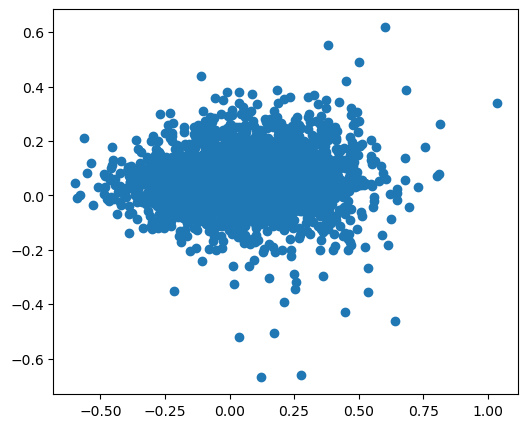

In [52]:
plt.scatter(df[" A [m npm]"],df["error"]) 

#### Wind vs. water level 

In [53]:
df_wind_wl = df_wind.set_index("date_time").join(df_res[["wl_tol","wl_hel"]])
df_wind_wl = df_wind_wl.dropna()

cond = df_wind_wl["AL [st]"]>348.75
df_wind_wl["AL1"] = df_wind_wl["AL [st]"]
df_wind_wl.loc[cond,"AL1"] = 348.75 - df_wind_wl.loc[cond,"AL1"]

df_wind_wl.head(3)

,AL [st],W [m/s],wl_tol,wl_hel,AL1
date_time,,,,,
2008-01-01 02:00:00,155.17,2.78,0.2592,0.264706,155.17
2008-01-01 03:00:00,161.50,2.45,0.2568,0.261176,161.50
2008-01-01 04:00:00,142.00,2.75,0.2544,0.260000,142.00


#### Finding the highest wind velocity `Ws` in each week and check if any relationhsip with water level at Tolkmicko or prediction error exists

In [54]:
def wind_direction(AL1_value):
    AL_bins = np.linspace(0,  360, 17, endpoint=True) - 22.5/2
    directions = ["N","NNE","NE","ENE","E","ESE","SE","SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]
    for i in range(1,len(AL_bins)):
        if AL1_value < AL_bins[i]:
            return(directions[i-1])
    return np.nan

In [55]:
import datetime
week = np.array(list(map(lambda ts: str(datetime.date(ts.year,ts.month,ts.day).isocalendar()[1])+"-"+str(ts.year),df_wind_wl.index)))
day = np.array(list(map(lambda ts: str(datetime.date(ts.year,ts.month,ts.day).timetuple().tm_yday)+"-"+str(ts.year),df_wind_wl.index)))
wdir = np.array(list(map(wind_direction,df_wind_wl["AL1"])))

In [56]:
df_wind_wl["week"] = week
df_wind_wl["day"] = day
df_wind_wl["wdir"] = wdir
df_wind_wl["date"] = df_wind_wl.index
df_wind_wl.head(3)

,AL [st],W [m/s],wl_tol,wl_hel,AL1,week,day,wdir,date
date_time,,,,,,,,,
2008-01-01 02:00:00,155.17,2.78,0.2592,0.264706,155.17,1-2008,1-2008,SSE,2008-01-01 02:00:00
2008-01-01 03:00:00,161.50,2.45,0.2568,0.261176,161.50,1-2008,1-2008,SSE,2008-01-01 03:00:00
2008-01-01 04:00:00,142.00,2.75,0.2544,0.260000,142.00,1-2008,1-2008,SE,2008-01-01 04:00:00


In [57]:
df_max_wind = df_wind_wl[["week","W [m/s]"]].groupby("week").max().sort_values(by="W [m/s]",ascending=False)

AL = []
wl_tol = []
wl_hel = []
wdir = []
for W,w in zip(df_max_wind["W [m/s]"].to_numpy(),df_max_wind.index):
    cond = (df_wind_wl["W [m/s]"]==W) & (df_wind_wl["week"] == w)
    row = df_wind_wl.loc[cond]
    AL.append(row["AL [st]"].values[0])
    wl_tol.append(row["wl_tol"].values[0])
    wl_hel.append(row["wl_hel"].values[0])
    wdir.append(row["wdir"].values[0])

df_max_wind["AL"] = AL
df_max_wind["wl_tol"] = wl_tol
df_max_wind["wl_hel"] = wl_hel
df_max_wind["wdir"] = wdir

df_max_wind.head(3)

,W [m/s],AL,wl_tol,wl_hel,wdir
week,,,,,
52-2017,35.27,276.83,0.260000,0.360000,W
50-2015,21.23,260.00,0.150000,0.410000,W
48-2011,21.00,294.00,-0.426154,0.329231,WNW


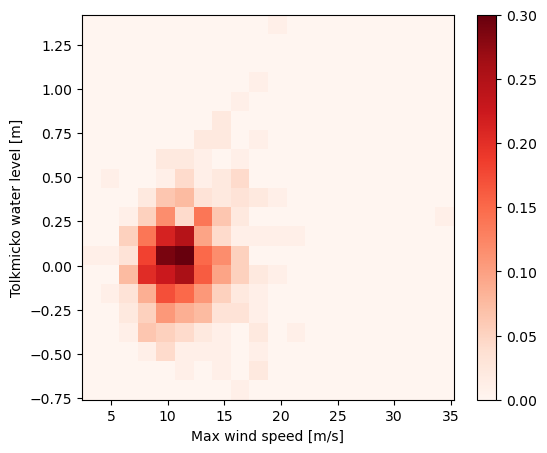

In [58]:
plt.rcParams['figure.figsize'] = [6, 5]
plt.rcParams['figure.dpi'] = 100 #

plt.hist2d(df_max_wind["W [m/s]"],df_max_wind["wl_tol"],bins=20,density=True,cmap=plt.cm.Reds)
plt.colorbar()
plt.xlabel("Max wind speed [m/s]")
plt.ylabel("Tolkmicko water level [m]")
pass

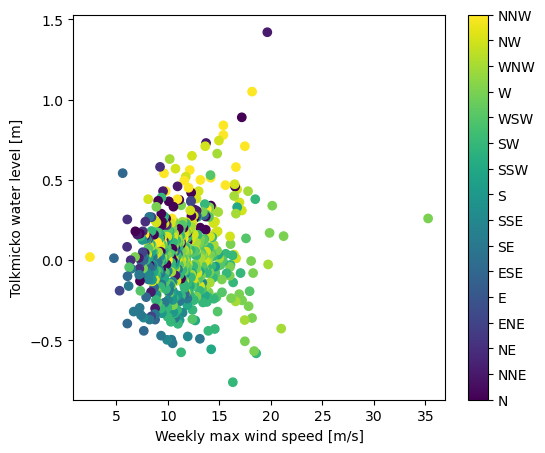

In [59]:
directions = ["N","NNE","NE","ENE","E","ESE","SE","SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]

dd = {d:i for i,d in enumerate(directions)}
dir_index = list(map(lambda d:dd.get(d,16),df_max_wind['wdir']))

plt.scatter(df_max_wind["W [m/s]"], df_max_wind["wl_tol"],c=dir_index)
plt.xlabel("Weekly max wind speed [m/s]")
plt.ylabel("Tolkmicko water level [m]")
cbar = plt.colorbar(ticks=list(range(len(directions))))
_ = cbar.ax.set_yticklabels(directions)

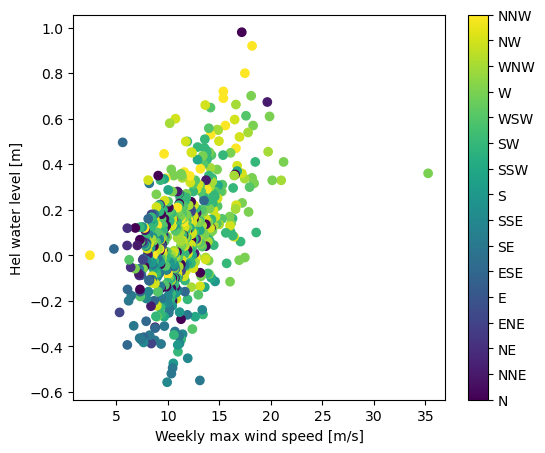

In [60]:
directions = ["N","NNE","NE","ENE","E","ESE","SE","SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]

dd = {d:i for i,d in enumerate(directions)}
dir_index = list(map(lambda d:dd.get(d,16),df_max_wind['wdir']))

plt.scatter(df_max_wind["W [m/s]"], df_max_wind["wl_hel"],c=dir_index)
plt.xlabel("Weekly max wind speed [m/s]")
plt.ylabel("Hel water level [m]")
cbar = plt.colorbar(ticks=list(range(len(directions))))
_ = cbar.ax.set_yticklabels(directions)